In [1]:
#1.
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in 'flipper_length_mm' and 'species' columns
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Calculate statistics for each species
stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Create histograms for each species
fig = px.histogram(penguins, x="flipper_length_mm", color="species", marginal="box",
                   facet_col="species", title="Penguins Flipper Length Analysis")

# Add lines and rectangles for each species
for species in stats['species']:
    species_stats = stats[stats['species'] == species].iloc[0]

    # Filter the facet subplot for this species
    fig.add_vline(x=species_stats['mean'], line=dict(color="red", width=2, dash="dash"),
                  annotation_text=f"Mean: {species_stats['mean']:.1f}", annotation_position="top left",
                  col=list(stats['species']).index(species) + 1)
    
    fig.add_vline(x=species_stats['median'], line=dict(color="blue", width=2, dash="dash"),
                  annotation_text=f"Median: {species_stats['median']:.1f}", annotation_position="top left",
                  col=list(stats['species']).index(species) + 1)
    
    # Add vertical rectangles for range, IQR, and ±2 Std Dev
    fig.add_vrect(x0=species_stats['min'], x1=species_stats['max'], fillcolor="lightgreen", opacity=0.2,
                  annotation_text="Range", col=list(stats['species']).index(species) + 1)
    
    fig.add_vrect(x0=species_stats['q1'], x1=species_stats['q3'], fillcolor="lightblue", opacity=0.2,
                  annotation_text="IQR", col=list(stats['species']).index(species) + 1)
    
    fig.add_vrect(x0=species_stats['mean'] - 2 * species_stats['std'], x1=species_stats['mean'] + 2 * species_stats['std'],
                  fillcolor="lightcoral", opacity=0.2, annotation_text="±2 Std Dev",
                  col=list(stats['species']).index(species) + 1)

# Show the plot
fig.show()

Final result:

In [2]:
# Remove individual annotations and instead add a clear legend for each element

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in 'flipper_length_mm' and 'species' columns
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Calculate statistics for each species
stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Create histograms for each species
fig = px.histogram(penguins, x="flipper_length_mm", color="species", marginal="box",
                   facet_col="species", title="Penguins Flipper Length Analysis")

# Add lines and rectangles for each species
for species in stats['species']:
    species_stats = stats[stats['species'] == species].iloc[0]

    # Column index for each species in the facet grid
    col_idx = list(stats['species']).index(species) + 1

    # Add mean and median lines without annotations
    fig.add_vline(x=species_stats['mean'], line=dict(color="red", width=2, dash="dash"),
                  col=col_idx)
    
    fig.add_vline(x=species_stats['median'], line=dict(color="blue", width=2, dash="dash"),
                  col=col_idx)
    
    # Add vertical rectangles for range, IQR, and ±2 Std Dev without annotations
    fig.add_vrect(x0=species_stats['min'], x1=species_stats['max'], fillcolor="lightgreen", opacity=0.2,
                  line_width=0, col=col_idx)
    
    fig.add_vrect(x0=species_stats['q1'], x1=species_stats['q3'], fillcolor="lightblue", opacity=0.2,
                  line_width=0, col=col_idx)
    
    fig.add_vrect(x0=species_stats['mean'] - 2 * species_stats['std'], x1=species_stats['mean'] + 2 * species_stats['std'],
                  fillcolor="lightcoral", opacity=0.2, line_width=0, col=col_idx)

# Add hidden traces to represent different statistical elements in the legend
# Mean line
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='red', dash='dash'),
                         showlegend=True, name='Mean'))

# Median line
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='blue', dash='dash'),
                         showlegend=True, name='Median'))

# Range rectangle
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=10, color='lightgreen'),
                         showlegend=True, name='Range'))

# IQR rectangle
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=10, color='lightblue'),
                         showlegend=True, name='IQR'))

# ±2 Std Dev rectangle
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=10, color='lightcoral'),
                         showlegend=True, name='±2 Std Dev'))

# Update the layout to position the legend
fig.update_layout(legend=dict(title='Statistical Features', orientation='h', yanchor='bottom', y=1.02,
                              xanchor='right', x=1))

# Show the plot
fig.show()

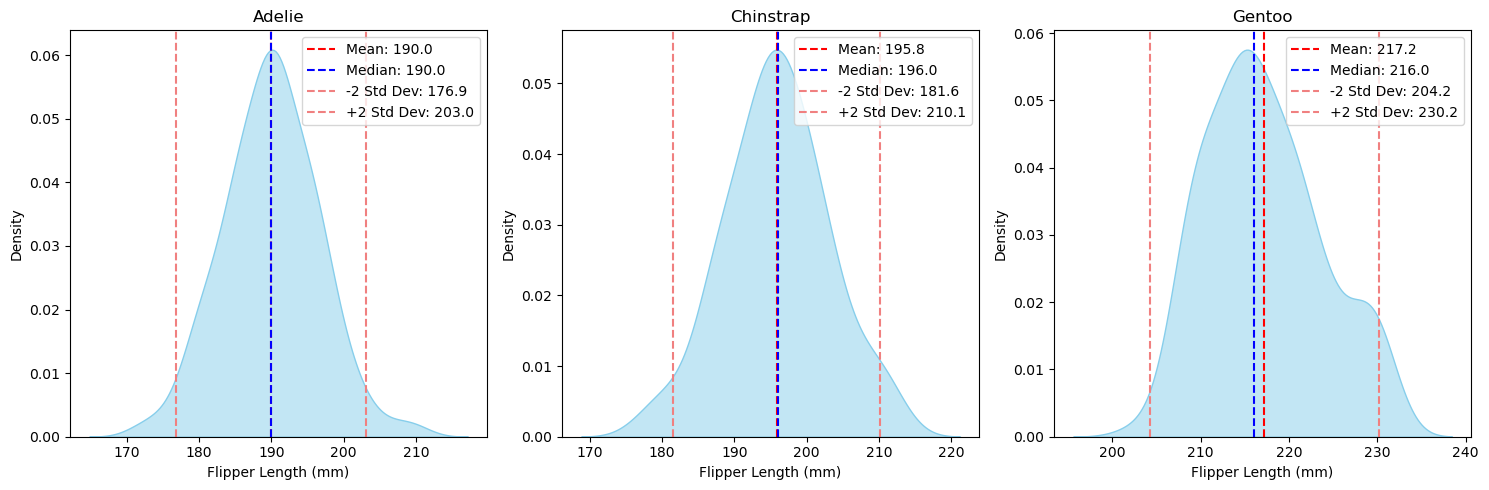

In [3]:
#2.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in 'flipper_length_mm' and 'species' columns
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Create a list of species
species = penguins['species'].unique()

# Loop through each species and create a KDE plot
for i, sp in enumerate(species):
    plt.subplot(1, 3, i + 1)
    
    # Create KDE plot
    sns.kdeplot(data=penguins[penguins['species'] == sp], x='flipper_length_mm', fill=True, color='skyblue', alpha=0.5)
    
    # Calculate statistics for annotation
    mean = penguins[penguins['species'] == sp]['flipper_length_mm'].mean()
    median = penguins[penguins['species'] == sp]['flipper_length_mm'].median()
    std_dev = penguins[penguins['species'] == sp]['flipper_length_mm'].std()

    # Add vertical lines for mean and median
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.1f}')
    plt.axvline(median, color='blue', linestyle='--', label=f'Median: {median:.1f}')
    plt.axvline(mean - 2 * std_dev, color='lightcoral', linestyle='--', label=f'-2 Std Dev: {mean - 2 * std_dev:.1f}')
    plt.axvline(mean + 2 * std_dev, color='lightcoral', linestyle='--', label=f'+2 Std Dev: {mean + 2 * std_dev:.1f}')
    
    # Set title and labels
    plt.title(sp)
    plt.xlabel('Flipper Length (mm)')
    plt.ylabel('Density')
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

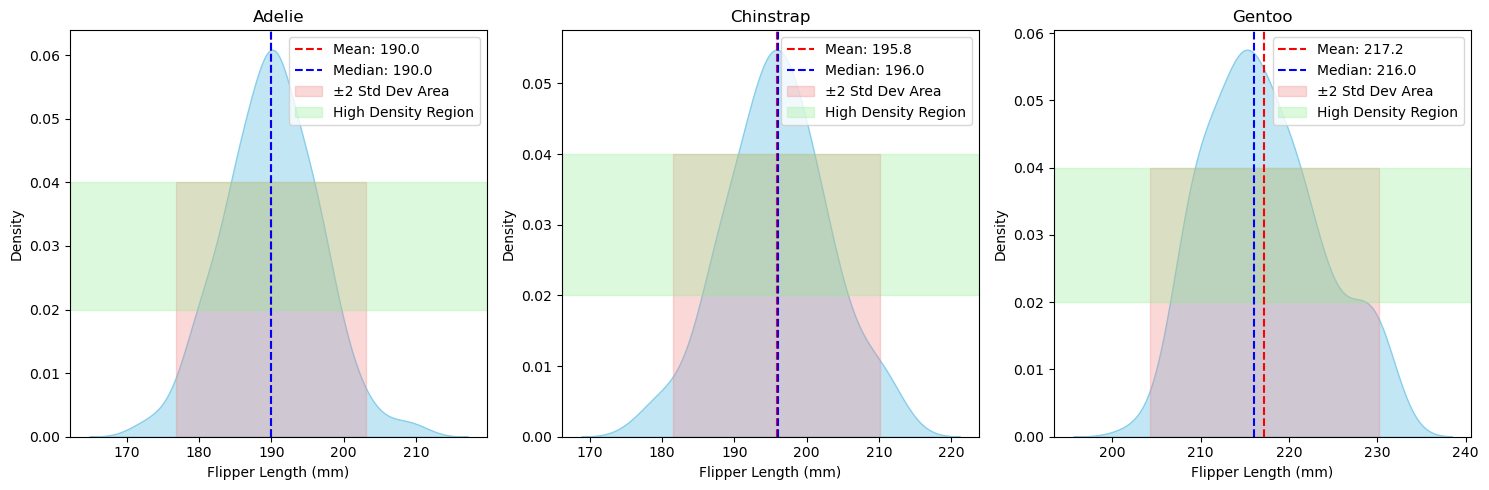

In [4]:
# Use ax.axhspan(...) or ax.fill_between(...) combined with the seaborn KDE plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in 'flipper_length_mm' and 'species' columns
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Create a list of species
species = penguins['species'].unique()

# Loop through each species and create a KDE plot
for i, sp in enumerate(species):
    ax = plt.subplot(1, 3, i + 1)
    
    # Create KDE plot
    sns.kdeplot(data=penguins[penguins['species'] == sp], x='flipper_length_mm', fill=True, color='skyblue', alpha=0.5)
    
    # Calculate statistics for annotation
    mean = penguins[penguins['species'] == sp]['flipper_length_mm'].mean()
    median = penguins[penguins['species'] == sp]['flipper_length_mm'].median()
    std_dev = penguins[penguins['species'] == sp]['flipper_length_mm'].std()

    # Add vertical lines for mean and median
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.1f}')
    ax.axvline(median, color='blue', linestyle='--', label=f'Median: {median:.1f}')
    
    # Add shaded area for ±2 Std Dev
    ax.fill_betweenx(y=[0, 0.04],  # Adjust y-range for visibility
                     x1=mean - 2 * std_dev, 
                     x2=mean + 2 * std_dev,
                     color='lightcoral', 
                     alpha=0.3, 
                     label='±2 Std Dev Area')
    
    # Add shaded region using axhspan (e.g., highlighting the region where density > 0.02)
    ax.axhspan(0.02, 0.04, color='lightgreen', alpha=0.3, label='High Density Region')

    # Set title and labels
    ax.set_title(sp)
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

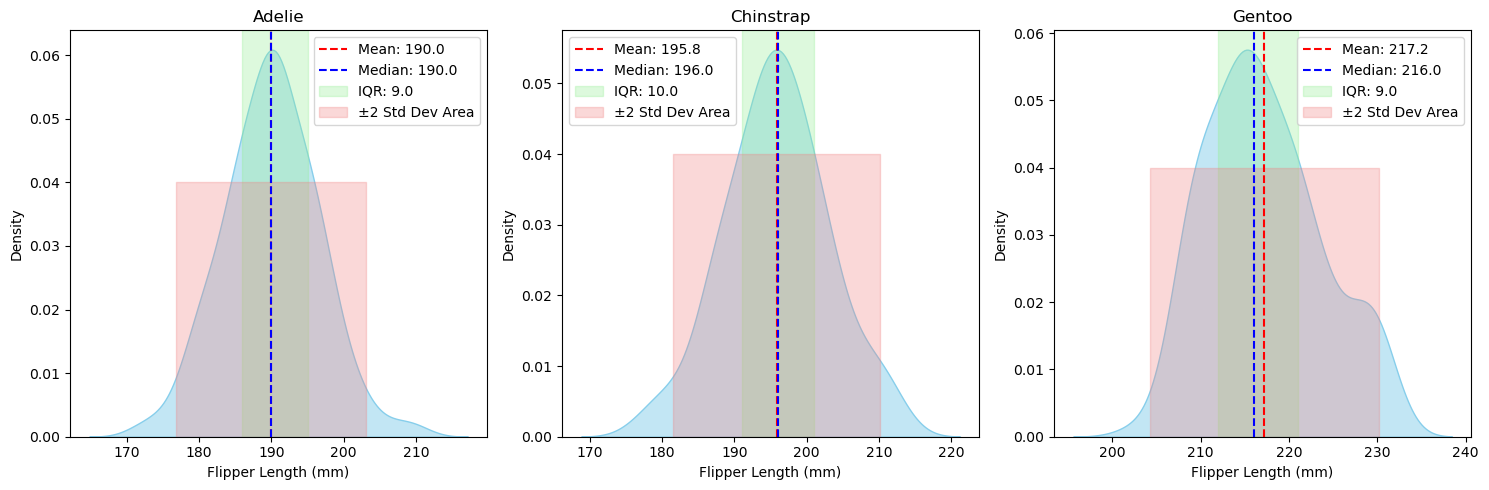

In [5]:
# Add the IQR Shading

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in 'flipper_length_mm' and 'species' columns
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Create a list of species
species = penguins['species'].unique()

# Loop through each species and create a KDE plot
for i, sp in enumerate(species):
    ax = plt.subplot(1, 3, i + 1)
    
    # Create KDE plot
    sns.kdeplot(data=penguins[penguins['species'] == sp], x='flipper_length_mm', fill=True, color='skyblue', alpha=0.5, ax=ax)
    
    # Calculate statistics for annotation
    flipper_lengths = penguins[penguins['species'] == sp]['flipper_length_mm']
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    std_dev = flipper_lengths.std()
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)
    iqr = q3 - q1

    # Add vertical lines for mean and median
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.1f}')
    ax.axvline(median, color='blue', linestyle='--', label=f'Median: {median:.1f}')
    
    # Add shaded area for IQR (Q1 to Q3)
    ax.axvspan(q1, q3, color='lightgreen', alpha=0.3, label=f'IQR: {iqr:.1f}')
    
    # Add shaded area for ±2 Std Dev
    ax.fill_betweenx(y=[0, 0.04],  # Adjust y-range for visibility
                     x1=mean - 2 * std_dev, 
                     x2=mean + 2 * std_dev,
                     color='lightcoral', 
                     alpha=0.3, 
                     label='±2 Std Dev Area')

    # Set title and labels
    ax.set_title(sp)
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

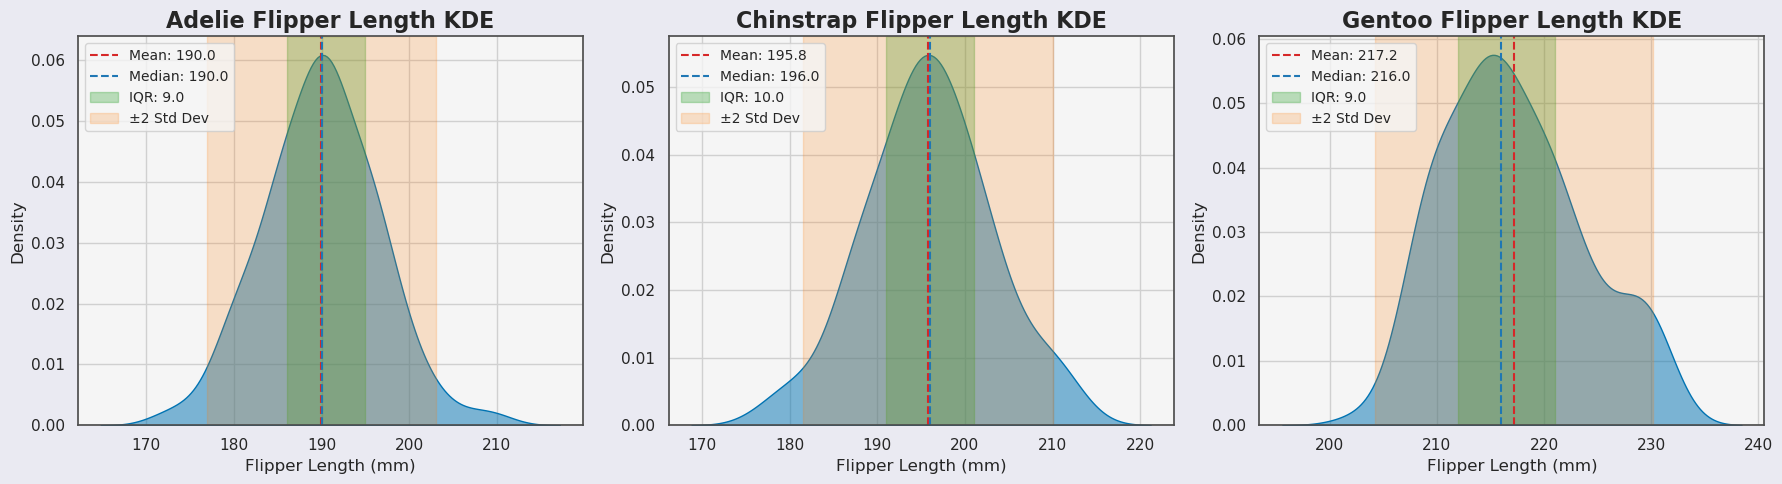

In [6]:
# Adjust the seaborn themes with sns.set_style() and sns.set_theme() and colors with the palette parameter

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in 'flipper_length_mm' and 'species' columns
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Set colorblind-friendly style and palette
sns.set_theme(style='whitegrid')  # Sets a general theme
sns.set_style({
    "axes.facecolor": "#f5f5f5",  # Set the background color to light grey
    "figure.facecolor": "#eaeaf2",  # Change the figure background color
    "grid.color": "#d0d0d0",  # Change grid color
    "axes.edgecolor": "#4f4f4f"  # Darker edge for better visibility
})
sns.set_palette("colorblind")  # Use the colorblind-friendly palette

# Set up the matplotlib figure with a custom background
fig, axes = plt.subplots(1, 3, figsize=(18, 5), facecolor='#eaeaf2')  # Customize figure background

# Create a list of species
species = penguins['species'].unique()

# Loop through each species and create a KDE plot
for i, sp in enumerate(species):
    ax = axes[i]  # Use the predefined axes from subplots
    
    # Create KDE plot using a color from the colorblind palette
    sns.kdeplot(data=penguins[penguins['species'] == sp], 
                x='flipper_length_mm', 
                fill=True, 
                ax=ax, 
                alpha=0.5)

    # Calculate statistics for annotation
    flipper_lengths = penguins[penguins['species'] == sp]['flipper_length_mm']
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    std_dev = flipper_lengths.std()
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)
    iqr = q3 - q1

    # Add vertical lines for mean and median
    ax.axvline(mean, color='#d62728', linestyle='--', label=f'Mean: {mean:.1f}')  # Colorblind red
    ax.axvline(median, color='#1f77b4', linestyle='--', label=f'Median: {median:.1f}')  # Colorblind blue
    
    # Add shaded area for IQR (Q1 to Q3)
    ax.axvspan(q1, q3, color='#2ca02c', alpha=0.3, label=f'IQR: {iqr:.1f}')  # Colorblind green
    
    # Add shaded area for ±2 Std Dev
    ax.axvspan(mean - 2 * std_dev, mean + 2 * std_dev, color='#ff7f0e', alpha=0.2, label='±2 Std Dev')  # Colorblind orange

    # Customize labels and title
    ax.set_title(f'{sp} Flipper Length KDE', fontsize=16, weight='bold')
    ax.set_xlabel('Flipper Length (mm)', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend(fontsize=10, loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

Final result:

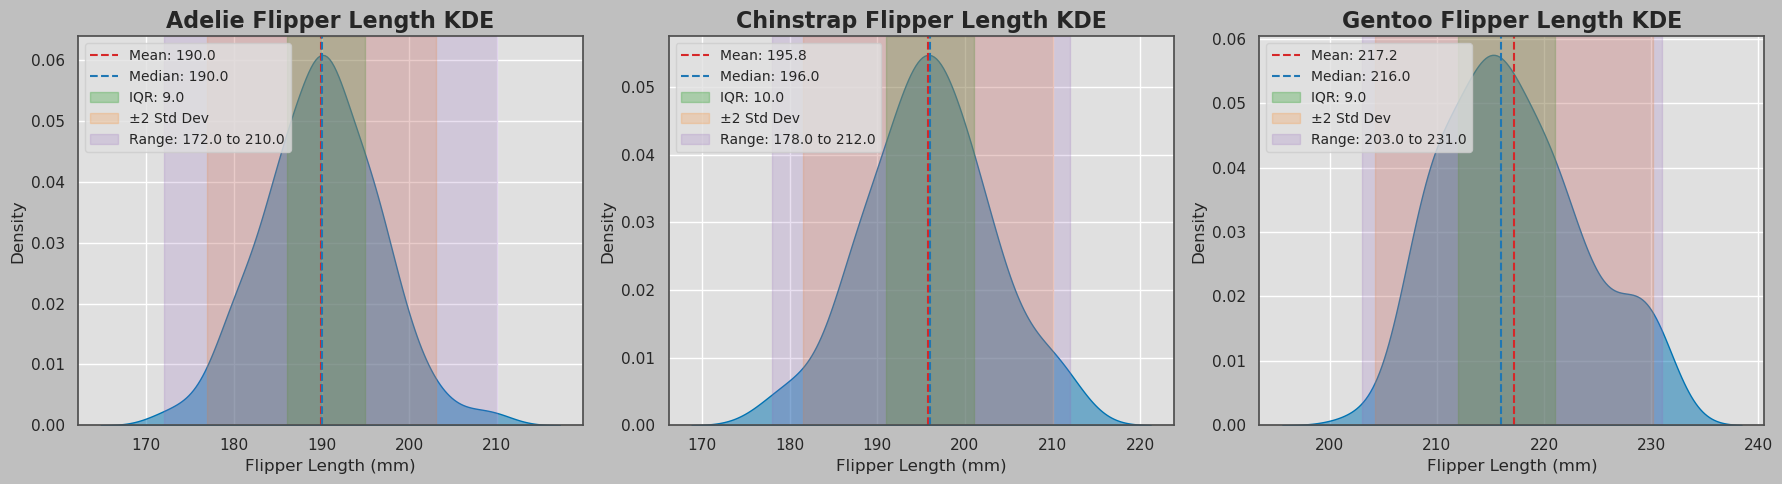

In [7]:
# Add Shading for the Range and background adjustments

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in 'flipper_length_mm' and 'species' columns
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Set a colorblind-friendly style and palette with a grey background
sns.set_theme(style='whitegrid')
sns.set_style({
    "axes.facecolor": "#e0e0e0",  # Set the background color of axes to grey
    "figure.facecolor": "#bfbfbf",  # Change the figure background color to a slightly darker grey
    "grid.color": "#ffffff",  # Set grid color to white for better contrast on grey background
    "axes.edgecolor": "#4f4f4f"  # Set the axes edge color to dark grey for visibility
})
sns.set_palette("colorblind")  # Use a colorblind-friendly palette

# Set up the matplotlib figure with a custom grey background
fig, axes = plt.subplots(1, 3, figsize=(18, 5), facecolor='#bfbfbf')  # Customize figure background color

# Create a list of species
species = penguins['species'].unique()

# Loop through each species and create a KDE plot
for i, sp in enumerate(species):
    ax = axes[i]  # Use the predefined axes from subplots
    
    # Create KDE plot using a color from the colorblind palette
    sns.kdeplot(data=penguins[penguins['species'] == sp], 
                x='flipper_length_mm', 
                fill=True, 
                ax=ax, 
                alpha=0.5)

    # Calculate statistics for annotation
    flipper_lengths = penguins[penguins['species'] == sp]['flipper_length_mm']
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    std_dev = flipper_lengths.std()
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)
    iqr = q3 - q1
    min_val = flipper_lengths.min()
    max_val = flipper_lengths.max()

    # Add vertical lines for mean and median
    ax.axvline(mean, color='#d62728', linestyle='--', label=f'Mean: {mean:.1f}')  # Colorblind red
    ax.axvline(median, color='#1f77b4', linestyle='--', label=f'Median: {median:.1f}')  # Colorblind blue
    
    # Add shaded area for IQR (Q1 to Q3)
    ax.axvspan(q1, q3, color='#2ca02c', alpha=0.3, label=f'IQR: {iqr:.1f}')  # Colorblind green
    
    # Add shaded area for ±2 Std Dev
    ax.axvspan(mean - 2 * std_dev, mean + 2 * std_dev, color='#ff7f0e', alpha=0.2, label='±2 Std Dev')  # Colorblind orange

    # Add shaded area for Range (Min to Max)
    ax.axvspan(min_val, max_val, color='#9467bd', alpha=0.2, label=f'Range: {min_val:.1f} to {max_val:.1f}')  # Colorblind purple

    # Customize labels and title
    ax.set_title(f'{sp} Flipper Length KDE', fontsize=16, weight='bold')
    ax.set_xlabel('Flipper Length (mm)', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend(fontsize=10, loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

3. Link to chat log histories: https://chatgpt.com/share/66f5e6b5-1944-800d-876c-ca3389717807

I prefer box plots because they are easier and clearer to use to help me analyze and compare the distribution of multiple sets of data. By looking at the chart I am able to directly access key information such as median, quartiles and range, and highlight the presence of outliers. This is because the box plot summarizes the data distribution using five numerical summaries: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. This compact representation allows us to quickly measure concentrated trends and variability. While a box plot does not provide the full shape of the distribution like a histogram or KDE, it is also able to represent skewness (for when the median is closer to one quartile) and can indicate whether the data is symmetrical or has outliers. Thus the summarized data distribution is not affected by extreme values. If I need to analyze data, box plots can be effective in improving the efficiency of data analysis. Since box plots represent aggregated data points, they can also make the visualization clearer and more intuitive if the data points overlap.

4.

In [15]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Which datasets have similar means and similar variances?
   A and C.
   
2. Which datasets have similar means but quite different variances?
   A and B or B and C.

3. Which datasets have similar variances but quite different means?
   B and D.

4. Which datasets have quite different means and quite different variances?
   A and D or C and D.

In [ ]:
Link to chat log histories: https://chatgpt.com/share/66f600aa-2398-800d-8071-beb7b807c5c0

5. While the mean and median describe trends in the concentration of data, “right-skewed” or “left-skewed” describes the shape of the data distribution. A right-skewed distribution has a long right tail, meaning that most of the data is concentrated on the left side, but there are a few larger values on the right side. A left-skewed distribution has the shape of a data distribution with a long left tail, meaning that most of the data is concentrated on the right side, but there are a few smaller values on the left side. "Right" skewness usually consists of a small number of extremely large values pulling up the mean, making the mean larger than the median. In contrast, in a "left" skewness distribution, a small number of extremely small values pull the mean down, making the mean smaller than the median. This is because the mean is more affected by extreme values, whereas the median represents only the data points in the middle of the data after sorting and is less susceptible to extreme values.

In [ ]:
# Import necessary libraries
from scipy import stats  # For statistical functions and distributions
import pandas as pd      # For data manipulation and analysis using DataFrames
import numpy as np       # For numerical operations and calculations

In [ ]:
# Generate a random sample from a Gamma distribution
# 'a' is the shape parameter, 'scale' is the scale parameter.
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)  # Generate 1000 random values from Gamma distribution

In [ ]:
# Create a histogram of the generated sample data using Plotly Express
# 'pd.DataFrame' converts the sample array into a DataFrame for easy plotting
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data") 

In [ ]:
# Calculate and print the mean of the sample1 data
sample1.mean()  # This calculates the average value of the sample1 data

In [ ]:
# Calculate and print the median of sample1 data using NumPy's quantile function
np.quantile(sample1, [0.5])  # This computes the 50th percentile (median) of sample1

In [ ]:
# Generate a second random sample from the negative of the same Gamma distribution
# This creates a sample where values will be negative
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)  # Generate 1000 random values and invert them

In [ ]:
Link to chat log histories: https://chatgpt.com/share/66f60027-e6c4-800d-ae94-4858ed46e0cf

6. The Iris dataset contains measurements for three species of iris flowers: Iris setosa, Iris versicolor, and Iris virginica, with four features measured: sepal length, sepal width, petal length, and petal width. 
Summary Statistics: Calculate the mean, median, standard deviation, minimum, and maximum for each feature.
Visualizations: (Create visualizations to illustrate key aspects)
Histograms of each feature.
Pair plots to show relationships between features.
Box plots to compare distributions across species.

In [11]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the URL
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
iris = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(iris.head())

# Summary Statistics
print("\nSummary Statistics:")
print(iris.describe())

# Check for missing values
print("\nMissing values in each column:")
print(iris.isnull().sum())

First few rows of the dataset:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Summary Statistics:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Missing values in each 

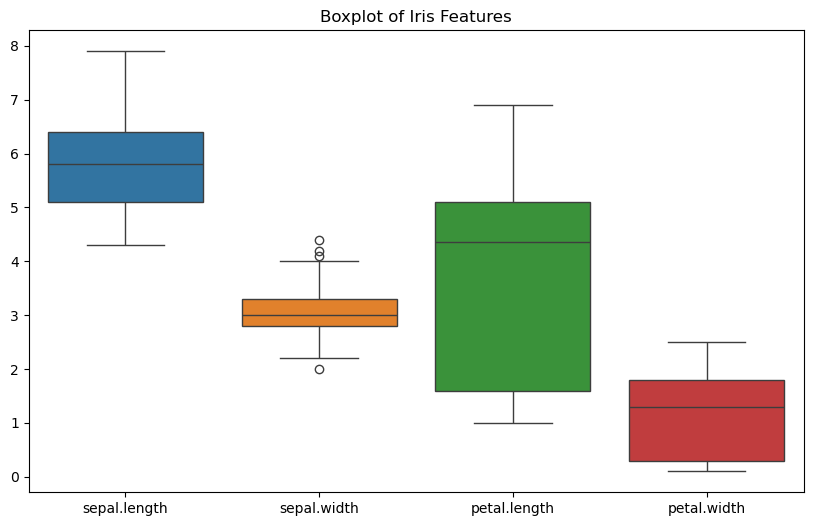

In [12]:
# Boxplot of features to observe spread and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris)
plt.title('Boxplot of Iris Features')
plt.show()

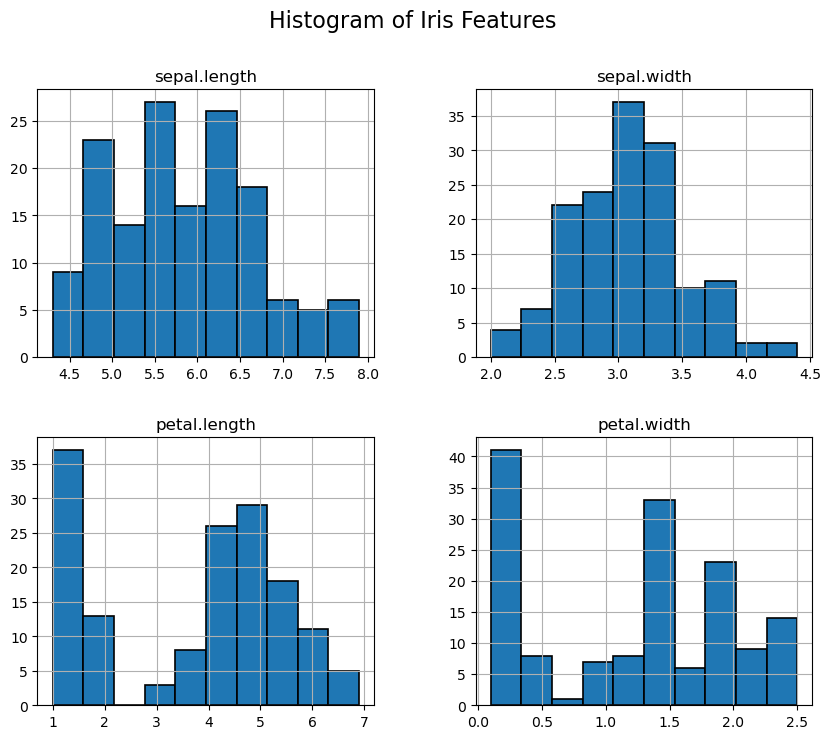

In [14]:
# Histogram of each feature to observe distributions
iris.hist(edgecolor='black', linewidth=1.2, figsize=(10, 8))
plt.suptitle('Histogram of Iris Features', fontsize=16)
plt.show()

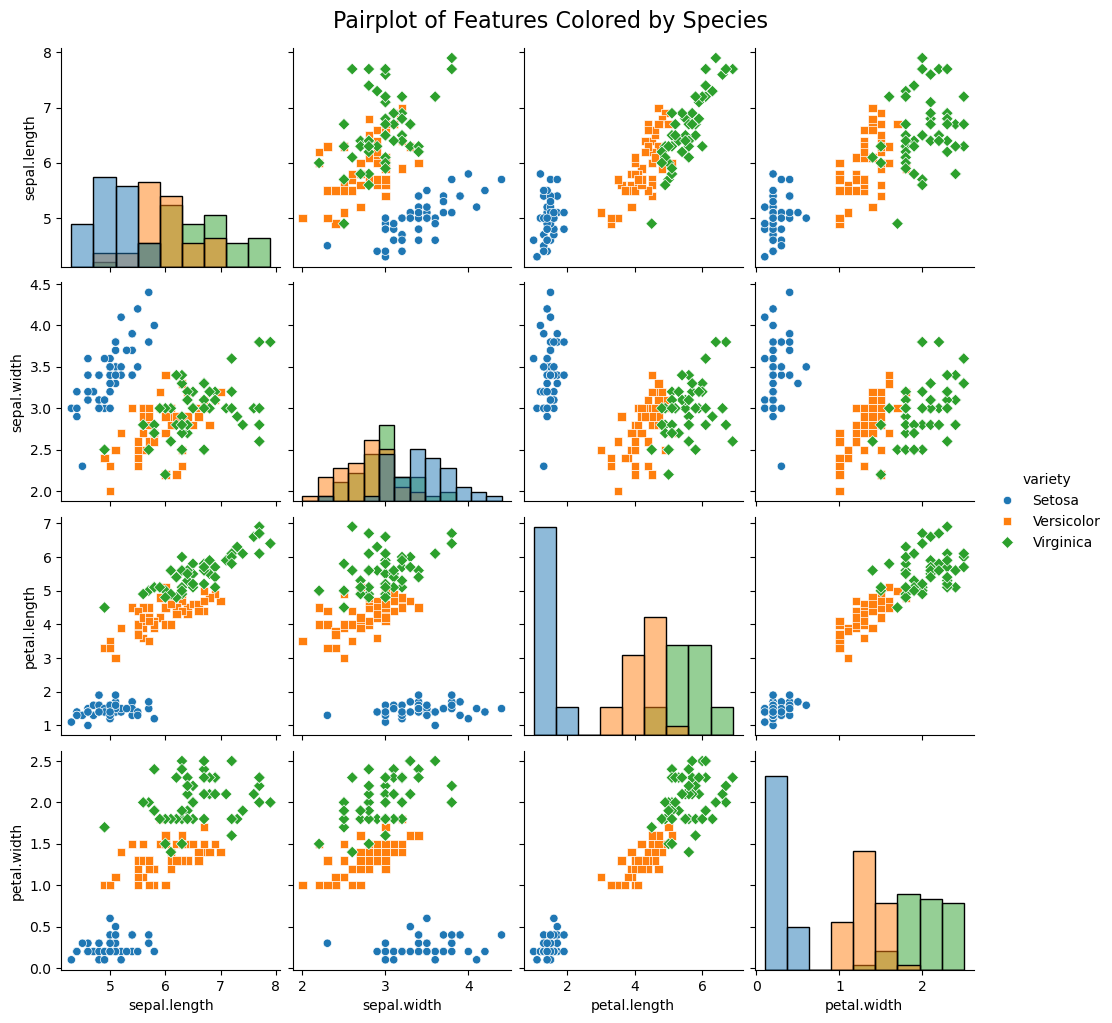

In [13]:
# Pairplot to visualize relationships between variables and species differentiation
sns.pairplot(iris, hue='variety', diag_kind='hist', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Features Colored by Species', fontsize=16, y=1.02)
plt.show()

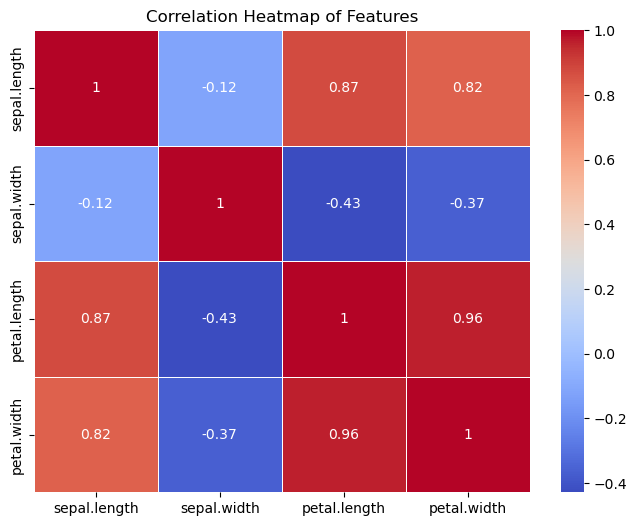

In [15]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = iris.drop('variety', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

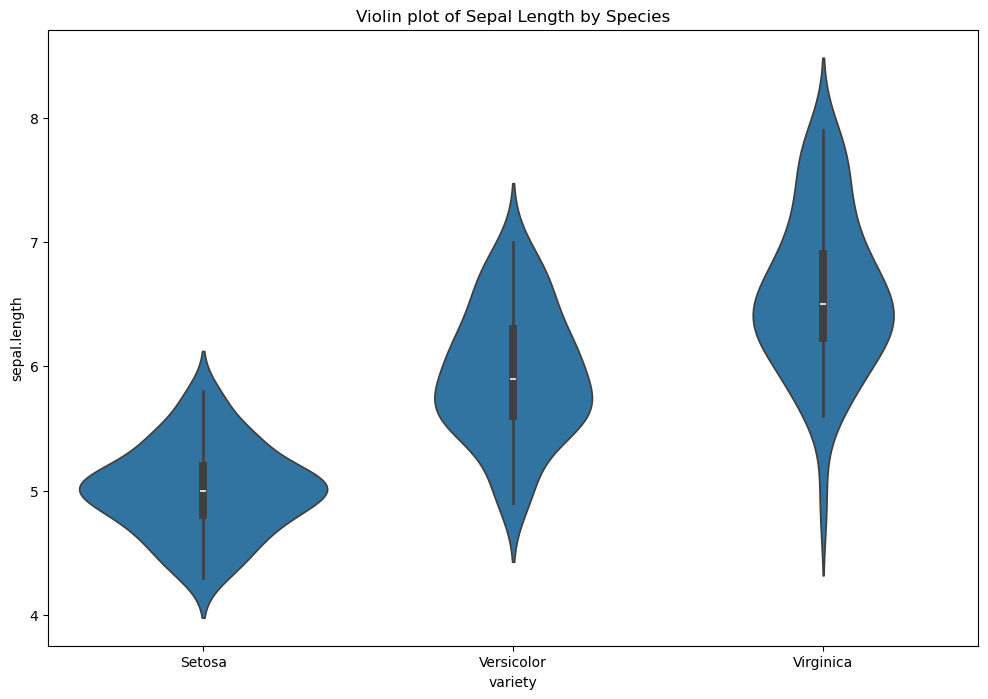

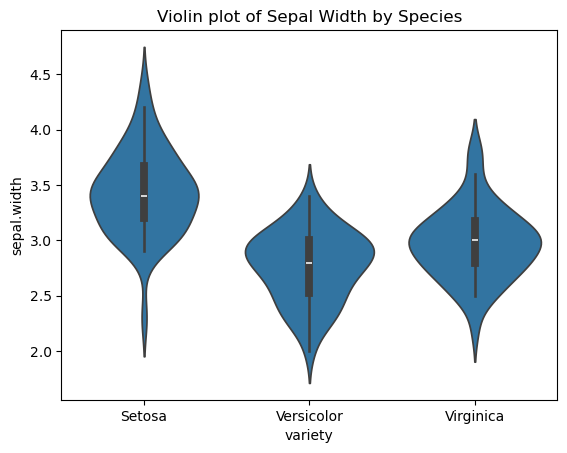

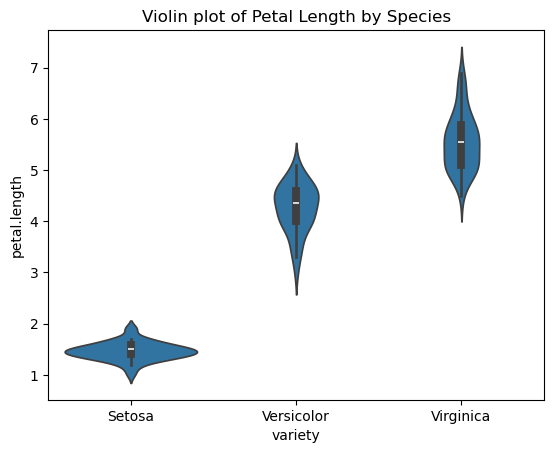

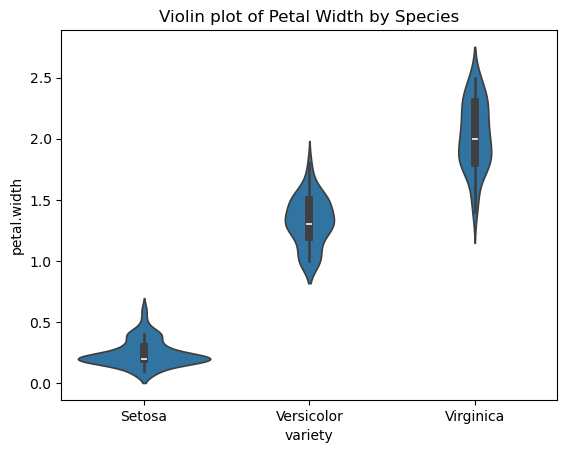

In [17]:
# Violin plot to compare feature distributions by species
plt.figure(figsize=(12, 8))
sns.violinplot(x='variety', y='sepal.length', data=iris)
plt.title('Violin plot of Sepal Length by Species')
plt.show()

sns.violinplot(x='variety', y='sepal.width', data=iris)
plt.title('Violin plot of Sepal Width by Species')
plt.show()

sns.violinplot(x='variety', y='petal.length', data=iris)
plt.title('Violin plot of Petal Length by Species')
plt.show()

sns.violinplot(x='variety', y='petal.width', data=iris)
plt.title('Violin plot of Petal Width by Species')
plt.show()

In [16]:
# Grouped summary statistics by species
print("\nGrouped Summary Statistics by Species:")
grouped_stats = iris.groupby('variety').describe()
print(grouped_stats)


Grouped Summary Statistics by Species:
           sepal.length                                              \
                  count   mean       std  min    25%  50%  75%  max   
variety                                                               
Setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal.width         ... petal.length      petal.width         \
                 count   mean  ...          75%  max       count   mean   
variety                        ...                                        
Setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
Versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50

This is a balanced dataset with 50 samples of each species. The dataset has a total of 150 rows and 5 columns (four features and one species label).
By comparing means and ranges, it can be concluded that petal length and width are generally larger in Virginica species compared to Setosa.
The visualization shows that Setosa can be easily distinguished from Versicolor and Virginica on the basis of characteristics such as petal length and width.

Link to chat log histories:
    https://chatgpt.com/share/66f60e70-2cb0-8004-9860-bbb10b3043de
    https://chatgpt.com/share/66f60cc2-9dc4-800e-92de-ddadd94a9fc2

7.

In [19]:
import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country", size="pop", 
                 color="continent", hover_name="country", log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

# Update the layout and trace markers to resemble ggplot2 style
fig.update_layout(title="GDP per Capita vs Life Expectancy Over Time",xaxis_title="GDP per Capita (Log Scale)",
                  yaxis_title="Life Expectancy",font=dict(family="Serif", size=12, color="black"),plot_bgcolor="white",
                  paper_bgcolor="white",xaxis=dict(showgrid=True, gridcolor="lightgray", zeroline=False),
                  yaxis=dict(showgrid=True, gridcolor="lightgray", zeroline=False),legend_title_text='Continent',
                  margin=dict(l=40, r=40, t=40, b=40),showlegend=True)

fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))

fig.show()

8.

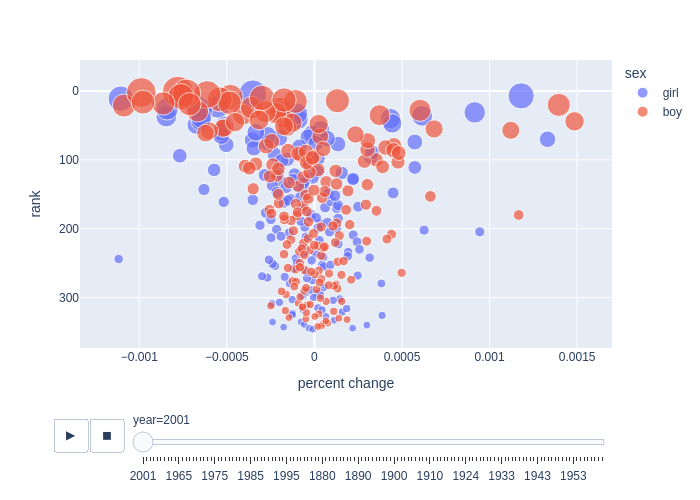

In [20]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

bn['name'] = bn['name'] + " " + bn['sex']  # Make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)  # Rank by percent
bn = bn.sort_values(['name', 'year'])  # Sort by name and year

# the next three lines create the increaes or decrease in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()

new_name = [True] + list(bn['name'][:-1].values != bn['name'][1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

bn = bn[bn['percent'] > 0.001]


fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name", size="percent",
                 color="sex", hover_name="name", size_max=50)

fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
9. Mostly.